# Homework-2 Forcasting Unleaded Gasoline Sales by Linear Regression

Yasin Secal 2018402135

## 1-) Introduction

The aim is forcasting Unleaded Gasoline Sales (UGS) in 2007 by using data  between 2000 and 2006. 


### 1.1-) Libraries

In [25]:
library(data.table)
library(tidyr)
library(ggplot2)
library(Hmisc)
library(forecast)
library(RcppRoll)
library(zoo)

### 1.2-) Data Uploading & Some Manipulation Operations

In [2]:
# Dataset is uploaded and name of columns changed
hw_data<-read.csv("C:/Users/lenovo/database/IE360_Spring22_HW2_data.csv",colClasses=c("character",rep("numeric",10)))
names(hw_data)<-c("Quarter","UGS","RNUV","NLPG","PU","PG","NUGV","NDGV","GNPA","GNPC","GNP")
hw_data<-data.table(hw_data)

In [3]:
str(hw_data)

Classes 'data.table' and 'data.frame':	32 obs. of  11 variables:
 $ Quarter: chr  "2000_Q1" "2000_Q2" "2000_Q3" "2000_Q4" ...
 $ UGS    : num  1128971 1199569 1370167 1127548 1033918 ...
 $ RNUV   : num  0.0146 0.0205 0.0207 0.0163 0.0071 0.0051 0.0041 0.0048 0.0012 0.0032 ...
 $ NLPG   : num  940000 941000 943500 948000 950000 ...
 $ PU     : num  469 459 440 402 412 ...
 $ PG     : num  356 345 327 301 306 ...
 $ NUGV   : num  4647500 4742876 4840931 4919685 4954754 ...
 $ NDGV   : num  282 284 287 288 288 ...
 $ GNPA   : num  1040173 1760460 6974808 3267125 1004528 ...
 $ GNPC   : num  3483132 4525451 5915204 4929778 3418387 ...
 $ GNP    : num  18022686 21797130 30050207 24480153 15832648 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [4]:
time<-hw_data$Quarter
hw_data[,Time:=time]
hw_data<-hw_data %>% separate(Quarter, c("year", "quarter"))

hw_data$quarter<-gsub("Q","",hw_data$quarter)
hw_data$year<-as.numeric(hw_data$year)
hw_data$quarter<-as.numeric(hw_data$quarter)

head(hw_data)

year,quarter,UGS,RNUV,NLPG,PU,PG,NUGV,NDGV,GNPA,GNPC,GNP,Time
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2000,1,1128971,0.0146,940000,469.03,355.69,4647500,281.9853,1040173,3483132,18022686,2000_Q1
2000,2,1199569,0.0205,941000,459.42,344.58,4742876,284.0813,1760460,4525451,21797130,2000_Q2
2000,3,1370167,0.0207,943500,439.98,327.21,4840931,286.7169,6974808,5915204,30050207,2000_Q3
2000,4,1127548,0.0163,948000,402.08,300.67,4919685,288.3137,3267125,4929778,24480153,2000_Q4
2001,1,1033918,0.0071,950000,411.58,305.75,4954754,287.6237,1004528,3418387,15832648,2001_Q1
2001,2,1019754,0.0051,955000,520.39,374.78,4980204,287.8814,1449357,4359831,20296918,2001_Q2


## 2-) Plotting the Dataset

In this part, the aim is commenting on data by looking the graph of general, mean, variance and autocorrelation of data

### 2.1-) Graph of Unleaded Gasoline

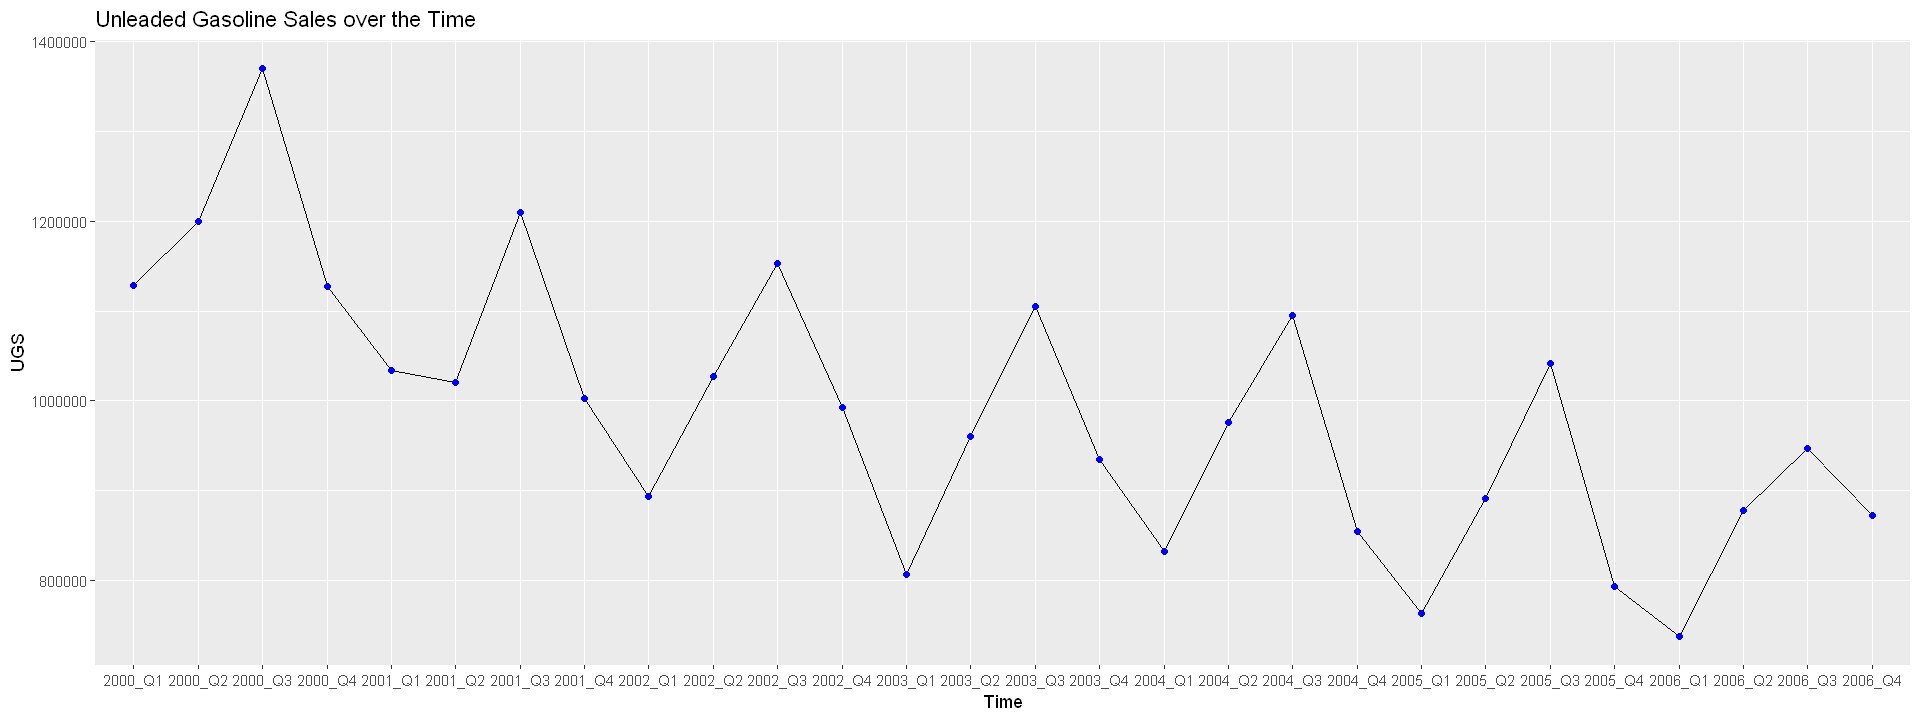

In [5]:
options(repr.plot.width=16,repr.plot.height=6)
ggplot(hw_data[year<2007] ,aes(x=Time,y=UGS,group=1)) + geom_line()+geom_point(color="blue")+ggtitle("Unleaded Gasoline Sales over the Time")

As seen above UGS is decreasing and it has seasonal pattern. It means that our UGS data is not statioanry. Also, it can be detected by looking the graph of mean and variance. 

### 2.2-) Graph of Mean & Variance

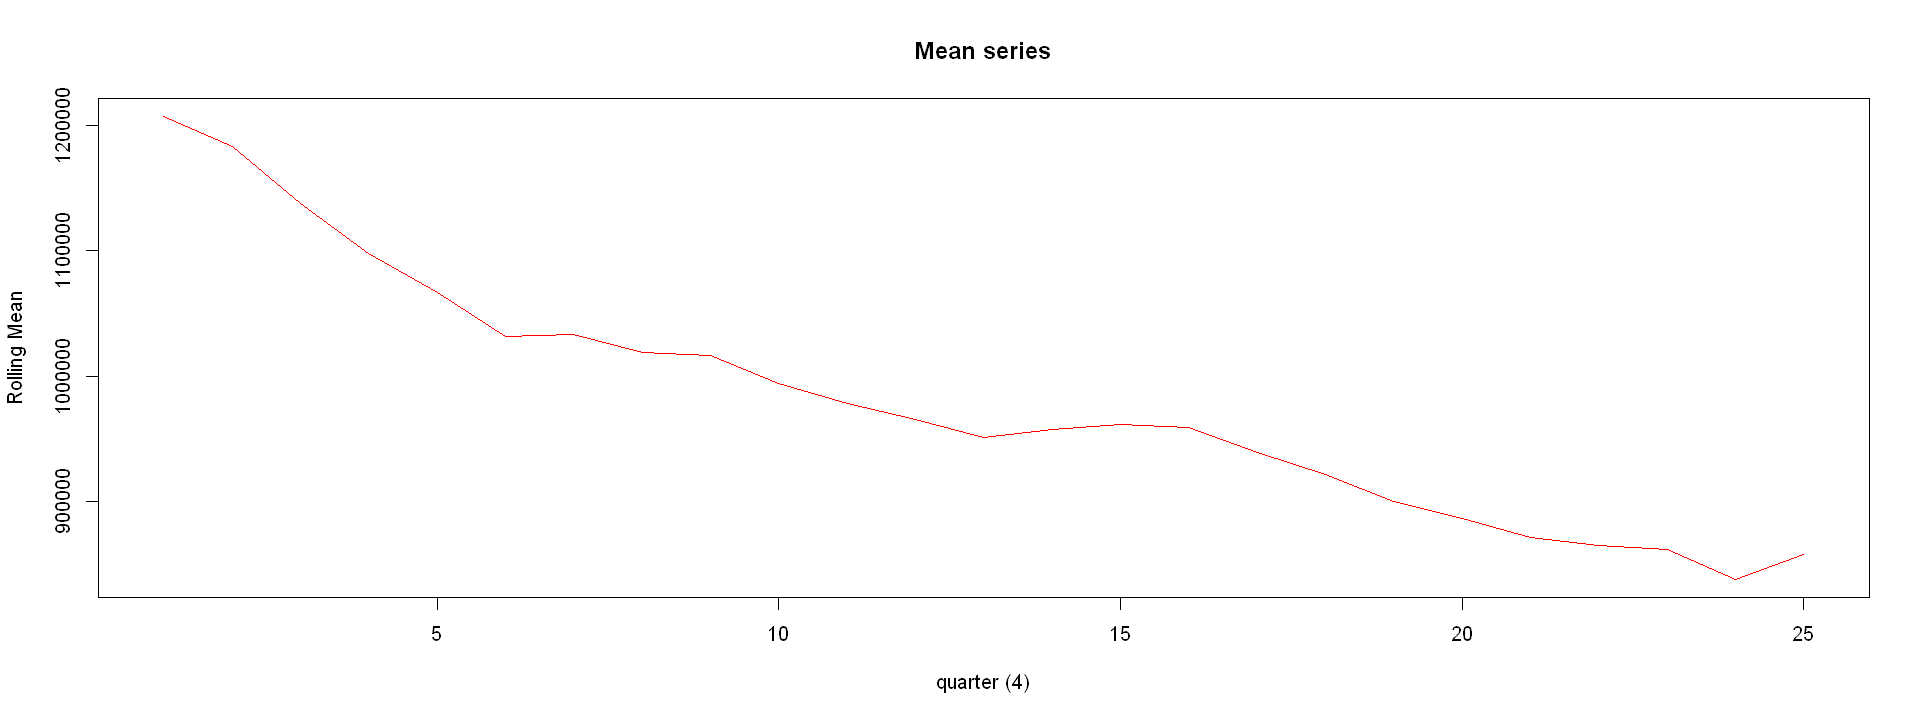

In [6]:
time_window<-4
mean_UGS<-roll_mean(hw_data[year<2007]$UGS,time_window,align='left')
var_UGS<-roll_var(hw_data[year<2007]$UGS,time_window,align='left')
plot(mean_UGS,
     type='l',col='red',
     xlab = "quarter (4)",
     ylab = "Rolling Mean",
     main = "Mean series")

Mean is decreasing and it is not stationary.

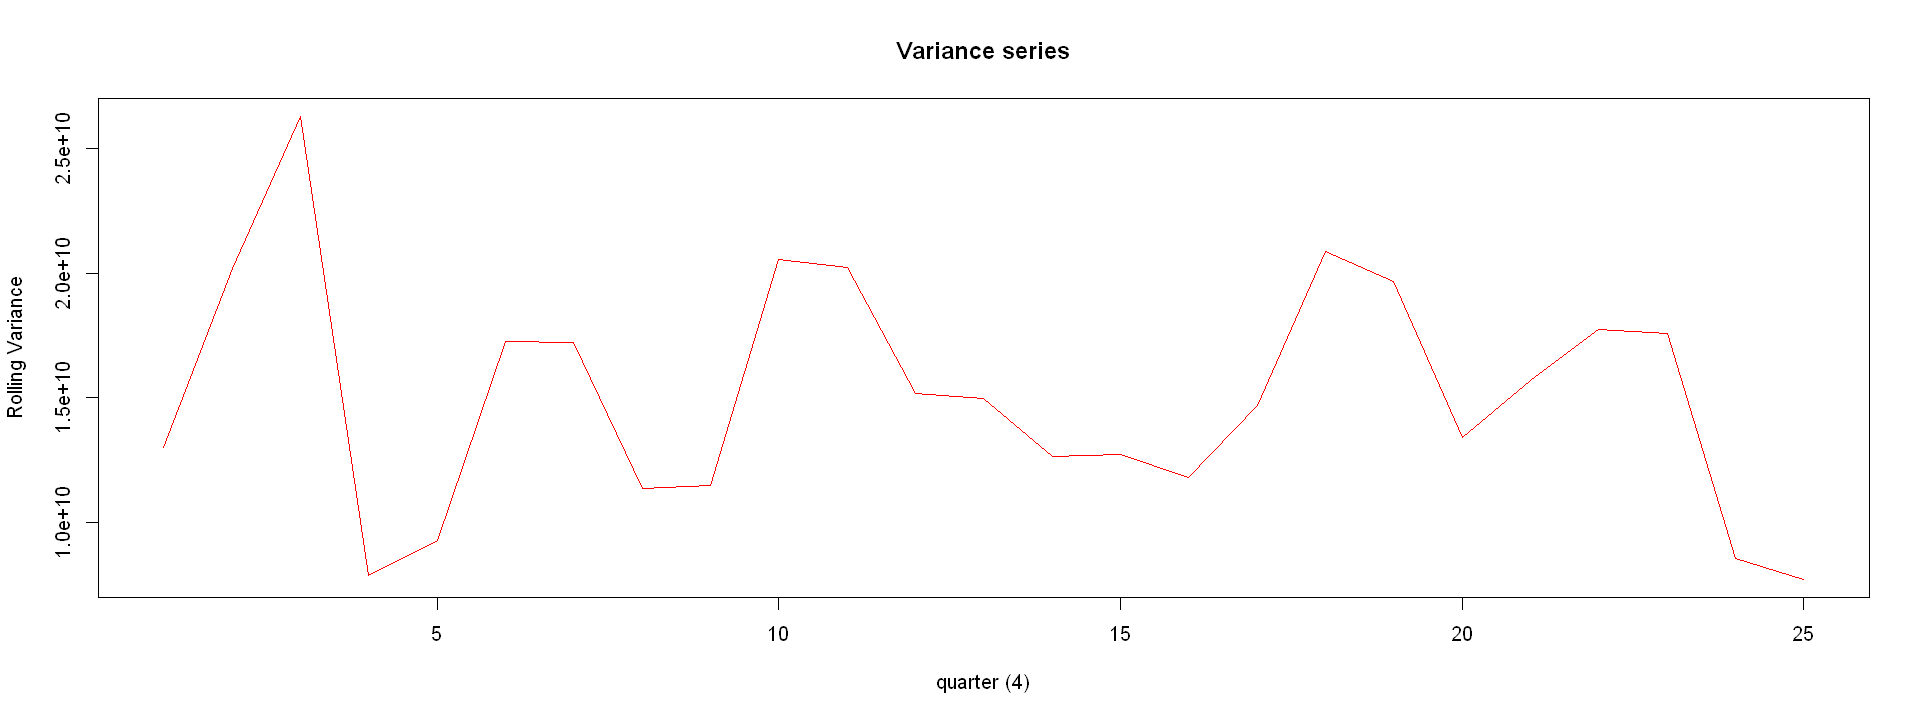

In [7]:
plot(var_UGS,
     type='l',col='red',
     xlab = "quarter (4)",
     ylab = "Rolling Variance",
     main = "Variance series")

The variance seems to be stationary. However, UGS is not stationary due to deacrease in the mean.

## 3-) Autocorrelation Graph of UGS

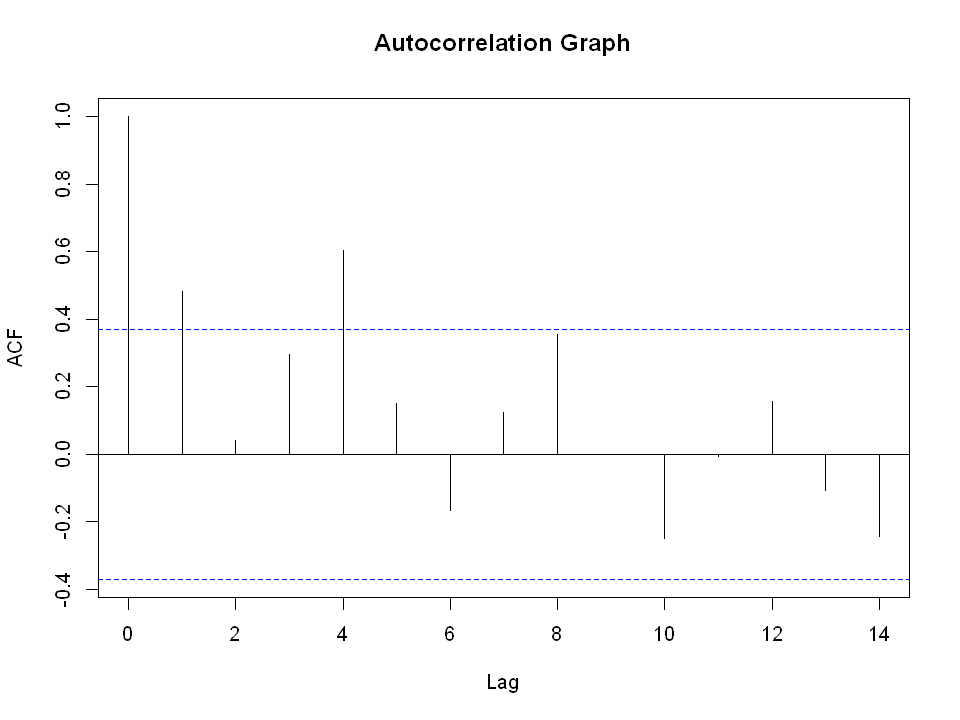

In [8]:
options(repr.plot.width=8,repr.plot.height=6)
autocorrelation<-acf(hw_data[year<2007]$UGS,plot=F)
plot(autocorrelation,main="Autocorrelation Graph")

Autocorrelation graph says that our data is autocorrelated because for some lags autocorrelation values are significant. Also, it is clear that our dataset has seasonality for lag = 4. It means Our dataset is yearly seasonal.

## 4-) Modeling with Seasonality, Trend, and Lag Terms

The dataset already has seasonality term, so it is only needed creating trend and lagged columns

In [9]:
# Trend term is added
hw_data[,trend:=(1:nrow(hw_data))]

### 4.1-) Modeling with only Trend Term

In [10]:
model1<-lm(UGS~trend,hw_data)
summary(model1)


Call:
lm(formula = UGS ~ trend, data = hw_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-199945  -73550  -21904   71224  237369 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1170777      43293  27.043  < 2e-16 ***
trend         -12660       2608  -4.854 4.95e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 111500 on 26 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.4754,	Adjusted R-squared:  0.4552 
F-statistic: 23.56 on 1 and 26 DF,  p-value: 4.945e-05



	Breusch-Godfrey test for serial correlation of order up to 6

data:  Residuals
LM test = 19.942, df = 6, p-value = 0.002836


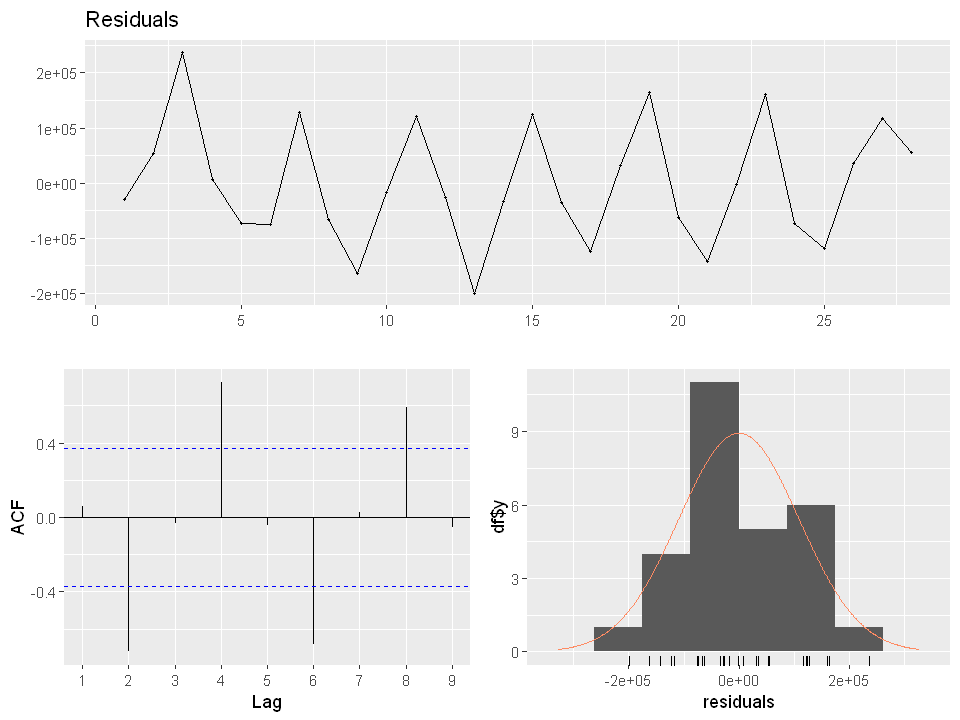

In [11]:
checkresiduals(model1)

As seen above, residuals have seasonality in lag equals 2. Also, seasonality is already added with lag equals 4. Therefore, it is needed to create a new term that is lagged term wit lag equals 2

In [12]:
# Lagged term added
hw_data[,lagged:=Lag(hw_data$UGS,2)]
head(hw_data)

year,quarter,UGS,RNUV,NLPG,PU,PG,NUGV,NDGV,GNPA,GNPC,GNP,Time,trend,lagged
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>
2000,1,1128971,0.0146,940000,469.03,355.69,4647500,281.9853,1040173,3483132,18022686,2000_Q1,1,NA
2000,2,1199569,0.0205,941000,459.42,344.58,4742876,284.0813,1760460,4525451,21797130,2000_Q2,2,NA
2000,3,1370167,0.0207,943500,439.98,327.21,4840931,286.7169,6974808,5915204,30050207,2000_Q3,3,1128971
2000,4,1127548,0.0163,948000,402.08,300.67,4919685,288.3137,3267125,4929778,24480153,2000_Q4,4,1199569
2001,1,1033918,0.0071,950000,411.58,305.75,4954754,287.6237,1004528,3418387,15832648,2001_Q1,5,1370167
2001,2,1019754,0.0051,955000,520.39,374.78,4980204,287.8814,1449357,4359831,20296918,2001_Q2,6,1127548


### 4.2-) Model-2 fitted with Trend and Seasonality Terms

In [13]:
model2<-lm(UGS~trend+quarter,hw_data)
summary(model2)


Call:
lm(formula = UGS ~ trend + quarter, data = hw_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-137740  -77142   -5190   74849  205875 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1073614      55093  19.487  < 2e-16 ***
trend         -13497       2398  -5.629 7.38e-06 ***
quarter        43723      17323   2.524   0.0183 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 101500 on 25 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.5819,	Adjusted R-squared:  0.5485 
F-statistic:  17.4 on 2 and 25 DF,  p-value: 1.845e-05



	Breusch-Godfrey test for serial correlation of order up to 6

data:  Residuals
LM test = 18.124, df = 6, p-value = 0.00593


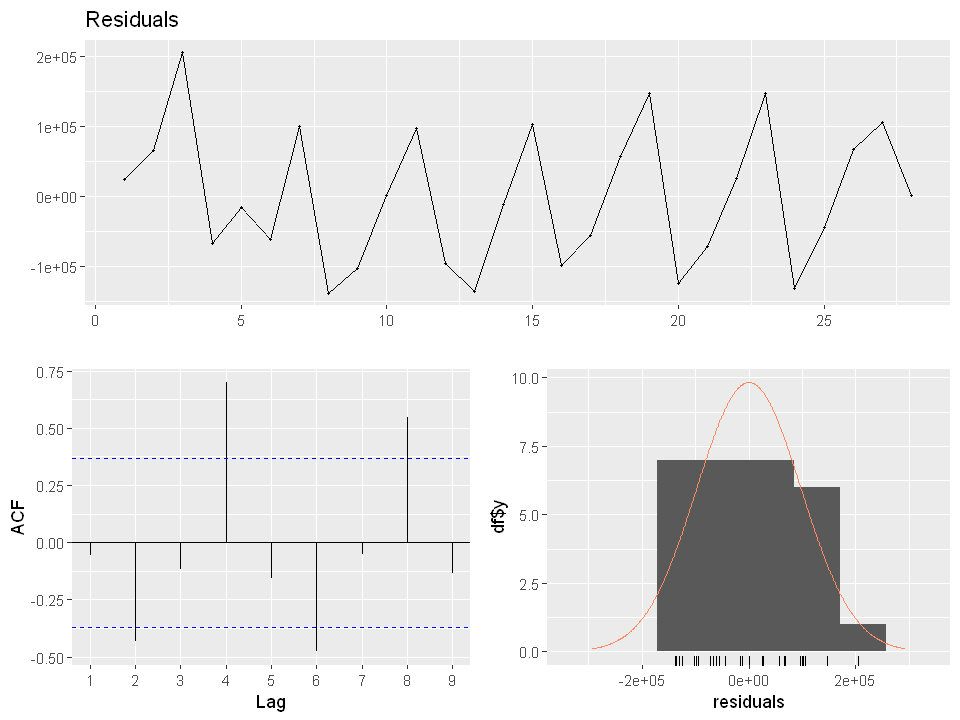

In [14]:
checkresiduals(model2)

### Model-3 fitted with Trend, Seasonality, and Lagged Terms

In [15]:
model3<-lm(UGS~trend+quarter+lagged,hw_data)
summary(model3)


Call:
lm(formula = UGS ~ trend + quarter + lagged, data = hw_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-134613  -55682   -6176   42014  205798 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.034e+06  2.354e+05   8.640 1.61e-08 ***
trend       -2.293e+04  3.171e+03  -7.230 3.04e-07 ***
quarter      7.908e+03  1.650e+04   0.479 0.636571    
lagged      -7.303e-01  1.710e-01  -4.271 0.000311 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 78990 on 22 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.7486,	Adjusted R-squared:  0.7143 
F-statistic: 21.83 on 3 and 22 DF,  p-value: 8.612e-07



	Breusch-Godfrey test for serial correlation of order up to 7

data:  Residuals
LM test = 11.242, df = 7, p-value = 0.1284


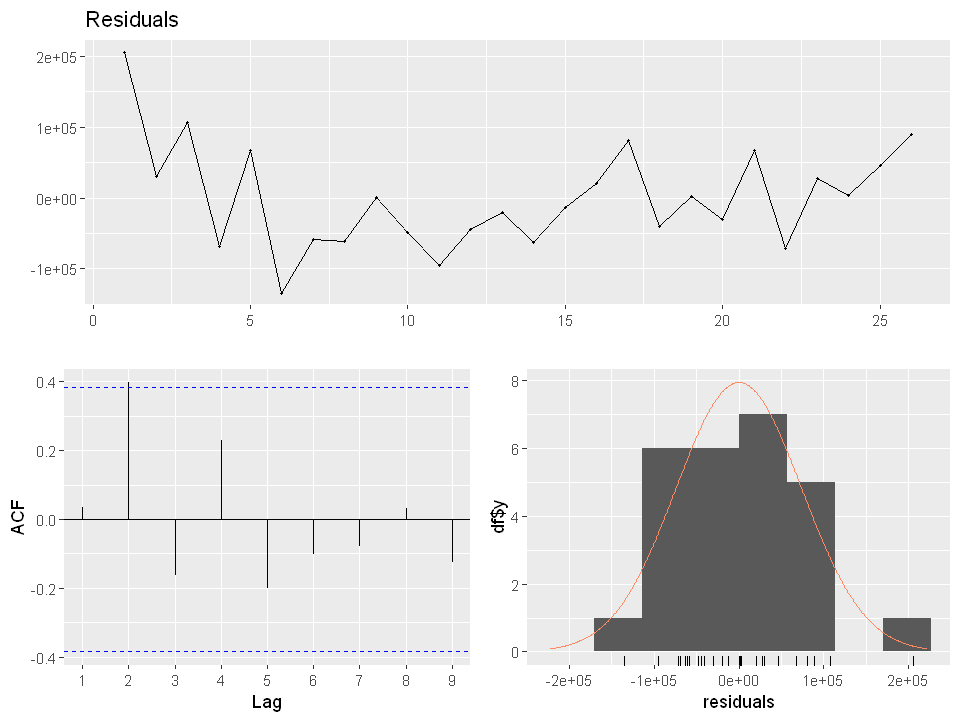

In [16]:
checkresiduals(model3)

Now, residuals are seems to be distributed normally. However, R-squared term is still low. Therefore, the model needs to new independent term.

## 5-) Creating New Models with Independent Terms in Dataset

Firstly, advanced correlation matrix is created.

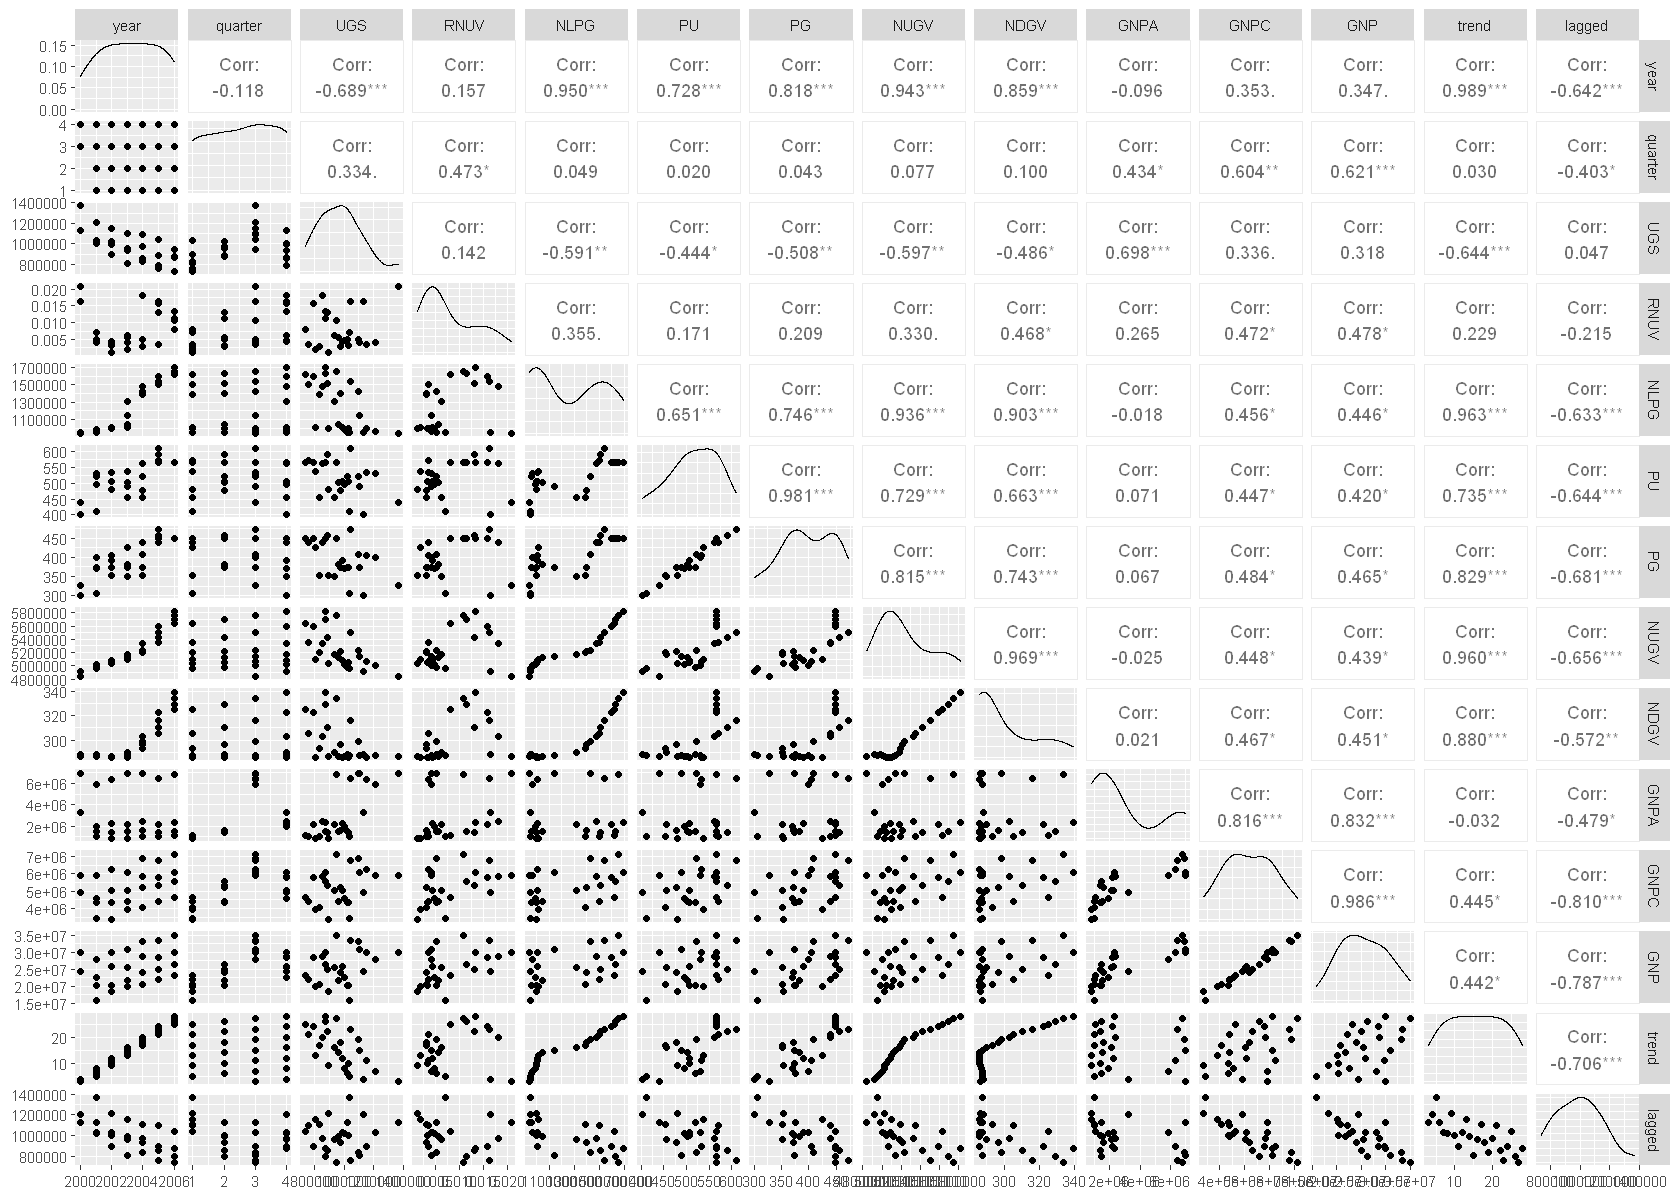

In [26]:
require(GGally)
options(repr.plot.width=14,repr.plot.height=10)
ggpairs(hw_data[3:28,-"Time"])

As seen above NDGV, NUGV, GNPA, PG, and PU terms are signifacntly correlated with Unleaded Gasoline Sales. Therefore, these terms are directly added to a new model to determine which of them are significant. Based on this model significant terms are selected. Then, used in another new model. 

### 5.1-) Model fitted on Terms significantly correlated with UGS.

In [18]:
model4<-lm(UGS~trend+quarter+NDGV+NUGV+GNPA+PG+PU+lagged,hw_data)
summary(model4)


Call:
lm(formula = UGS ~ trend + quarter + NDGV + NUGV + GNPA + PG + 
    PU + lagged, data = hw_data)

Residuals:
   Min     1Q Median     3Q    Max 
-55124 -28111   1989  19849  68468 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2.879e+06  8.284e+05   3.475  0.00290 **
trend       -1.115e+04  6.629e+03  -1.683  0.11069   
quarter     -5.877e+03  9.574e+03  -0.614  0.54746   
NDGV         1.090e+04  3.234e+03   3.371  0.00363 **
NUGV        -8.271e-01  3.305e-01  -2.503  0.02283 * 
GNPA         2.357e-02  6.061e-03   3.888  0.00118 **
PG           1.865e+02  1.687e+03   0.111  0.91329   
PU          -5.024e+02  1.262e+03  -0.398  0.69540   
lagged      -5.396e-01  1.455e-01  -3.709  0.00174 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 40990 on 17 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.9477,	Adjusted R-squared:  0.9231 
F-statistic: 38.49 on 8 and 1

As seen here, only NDGV, NUGV, and GNPA have more significant on this model. Therefore, this 3 is selected for further model.


	Breusch-Godfrey test for serial correlation of order up to 12

data:  Residuals
LM test = 19.398, df = 12, p-value = 0.07936


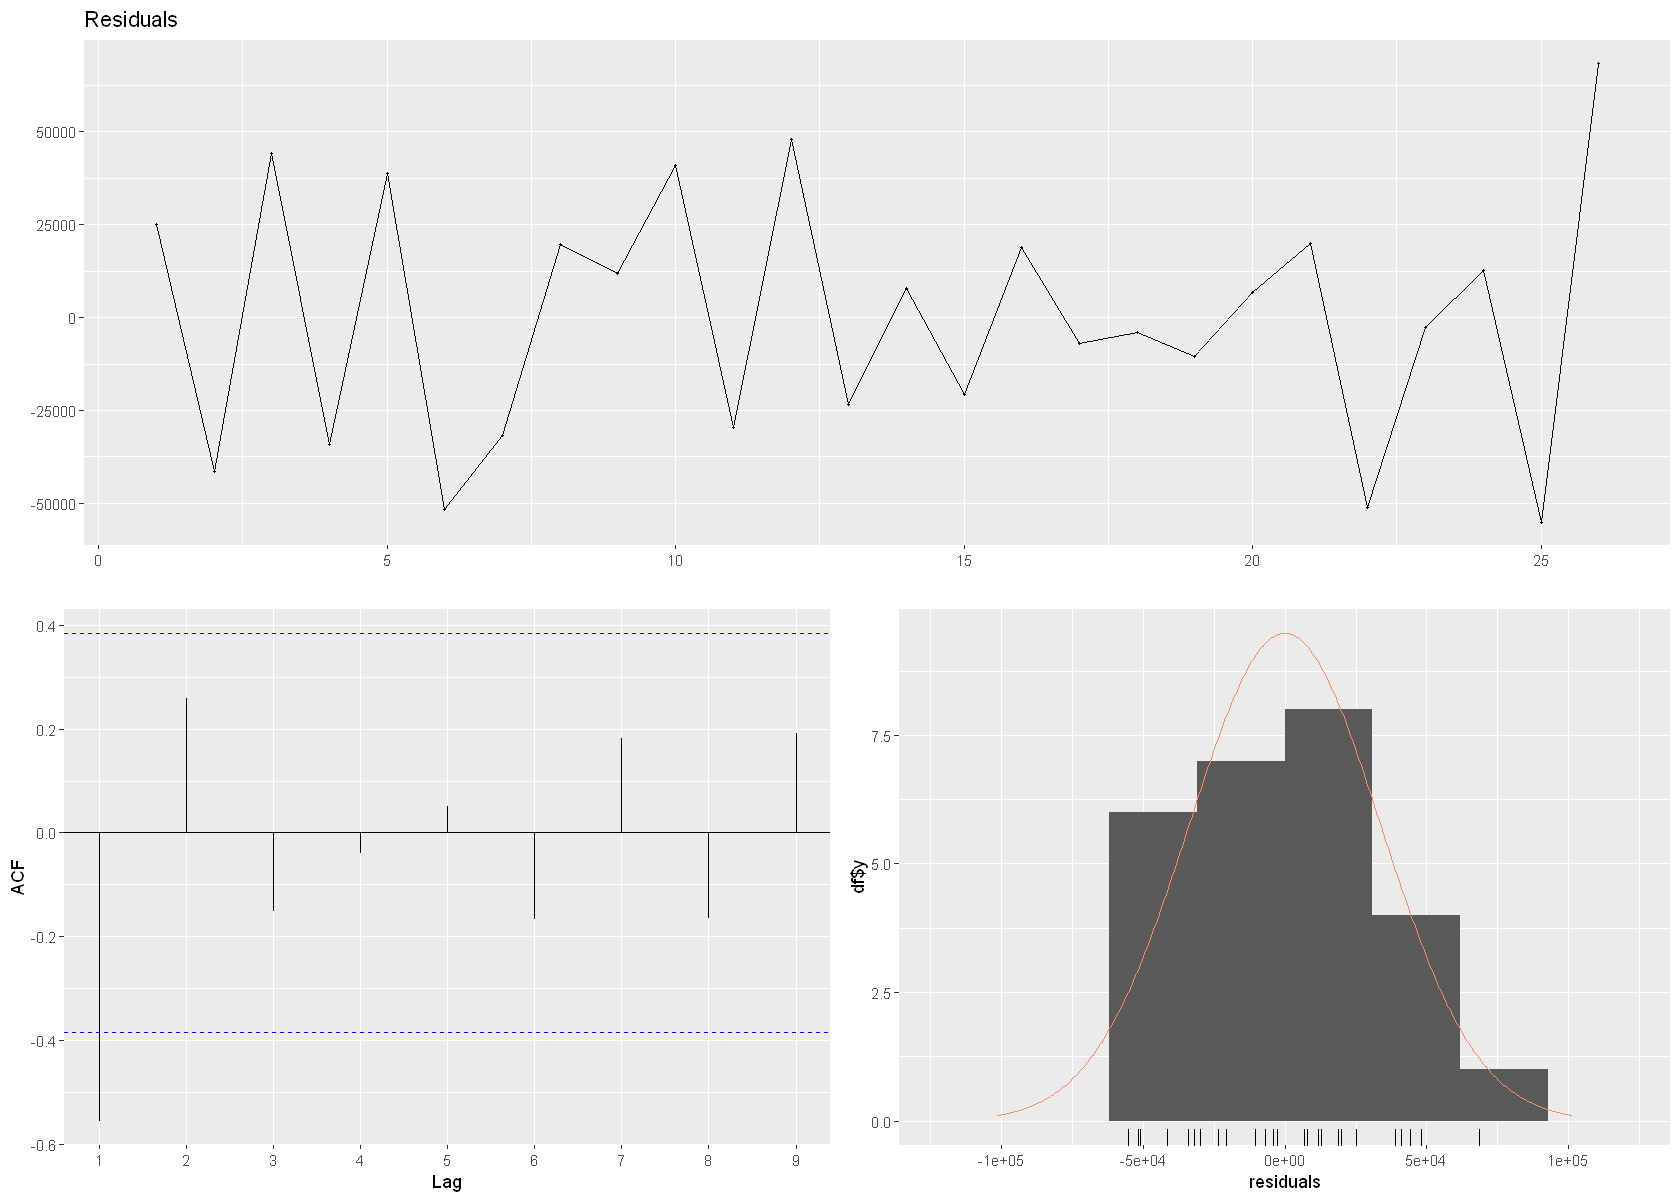

In [19]:
checkresiduals(model4)

### 5.3-) Model fitted on Terms are significant

In [20]:
model5<-lm(UGS~trend+quarter+NDGV+NUGV+GNPA+lagged,hw_data)
summary(model5)


Call:
lm(formula = UGS ~ trend + quarter + NDGV + NUGV + GNPA + lagged, 
    data = hw_data)

Residuals:
   Min     1Q Median     3Q    Max 
-55508 -29619  -2534  25415  72167 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.917e+06  8.243e+05   3.539 0.002190 ** 
trend       -9.887e+03  5.939e+03  -1.665 0.112375    
quarter     -2.461e+03  9.001e+03  -0.273 0.787454    
NDGV         1.139e+04  3.176e+03   3.585 0.001974 ** 
NUGV        -9.144e-01  3.244e-01  -2.819 0.010960 *  
GNPA         2.395e-02  5.730e-03   4.180 0.000507 ***
lagged      -4.802e-01  1.298e-01  -3.699 0.001522 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 41300 on 19 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.9406,	Adjusted R-squared:  0.9219 
F-statistic: 50.17 on 6 and 19 DF,  p-value: 1.207e-10



	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 17.549, df = 10, p-value = 0.06306


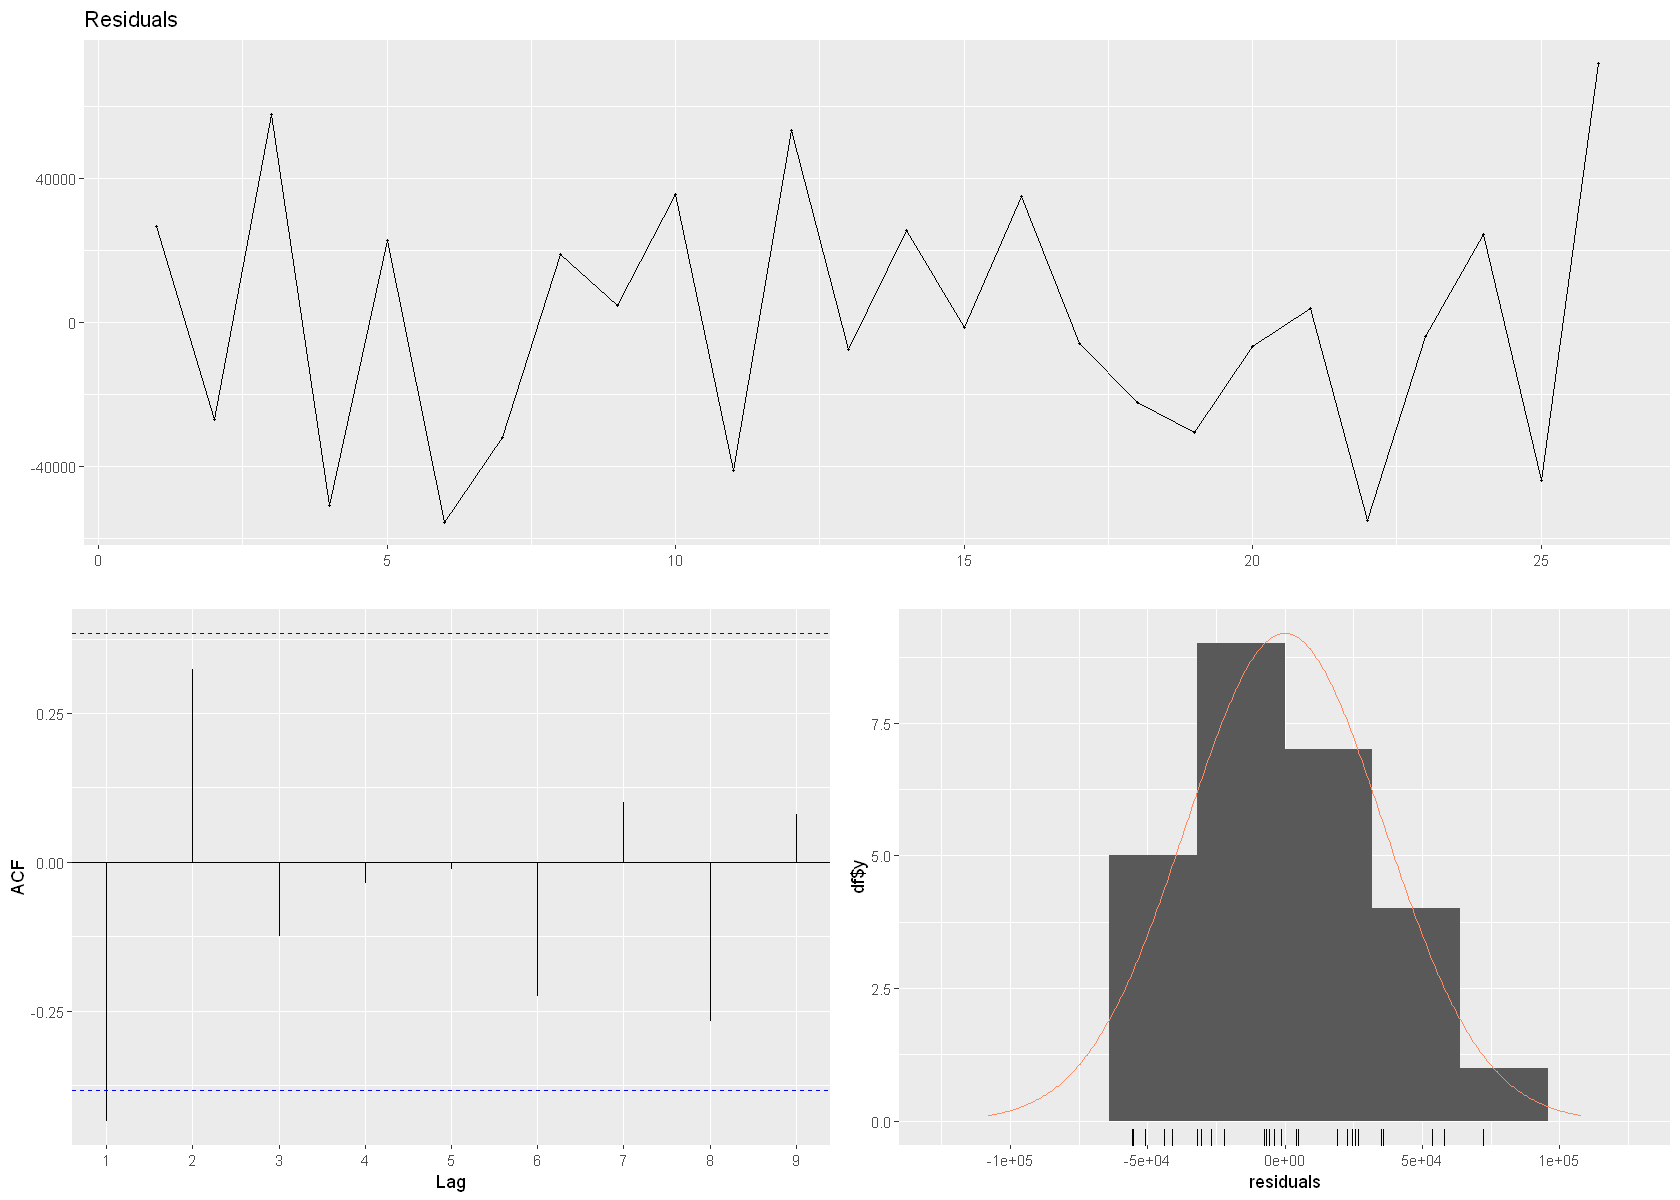

In [21]:
checkresiduals(model5)

Now it is time to determine better model for forecasting 2007. Adjusted R-square is important statistic, because it penalizes the extra terms used in the models. Thus, model-4 gives better when compared to:
- Adj. R-square value and it is used for forecasting. 
- Median and Maximum Values of Residuals.
- However, p-value of model-5 is a bit better yet model-4 is better in terms of first 2 lines.

### 5.3-) Final Model


Call:
lm(formula = UGS ~ trend + quarter + NDGV + NUGV + GNPA + PG + 
    PU + lagged, data = hw_data)

Residuals:
   Min     1Q Median     3Q    Max 
-55124 -28111   1989  19849  68468 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2.879e+06  8.284e+05   3.475  0.00290 **
trend       -1.115e+04  6.629e+03  -1.683  0.11069   
quarter     -5.877e+03  9.574e+03  -0.614  0.54746   
NDGV         1.090e+04  3.234e+03   3.371  0.00363 **
NUGV        -8.271e-01  3.305e-01  -2.503  0.02283 * 
GNPA         2.357e-02  6.061e-03   3.888  0.00118 **
PG           1.865e+02  1.687e+03   0.111  0.91329   
PU          -5.024e+02  1.262e+03  -0.398  0.69540   
lagged      -5.396e-01  1.455e-01  -3.709  0.00174 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 40990 on 17 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.9477,	Adjusted R-squared:  0.9231 
F-statistic: 38.49 on 8 and 1


	Breusch-Godfrey test for serial correlation of order up to 12

data:  Residuals
LM test = 19.398, df = 12, p-value = 0.07936


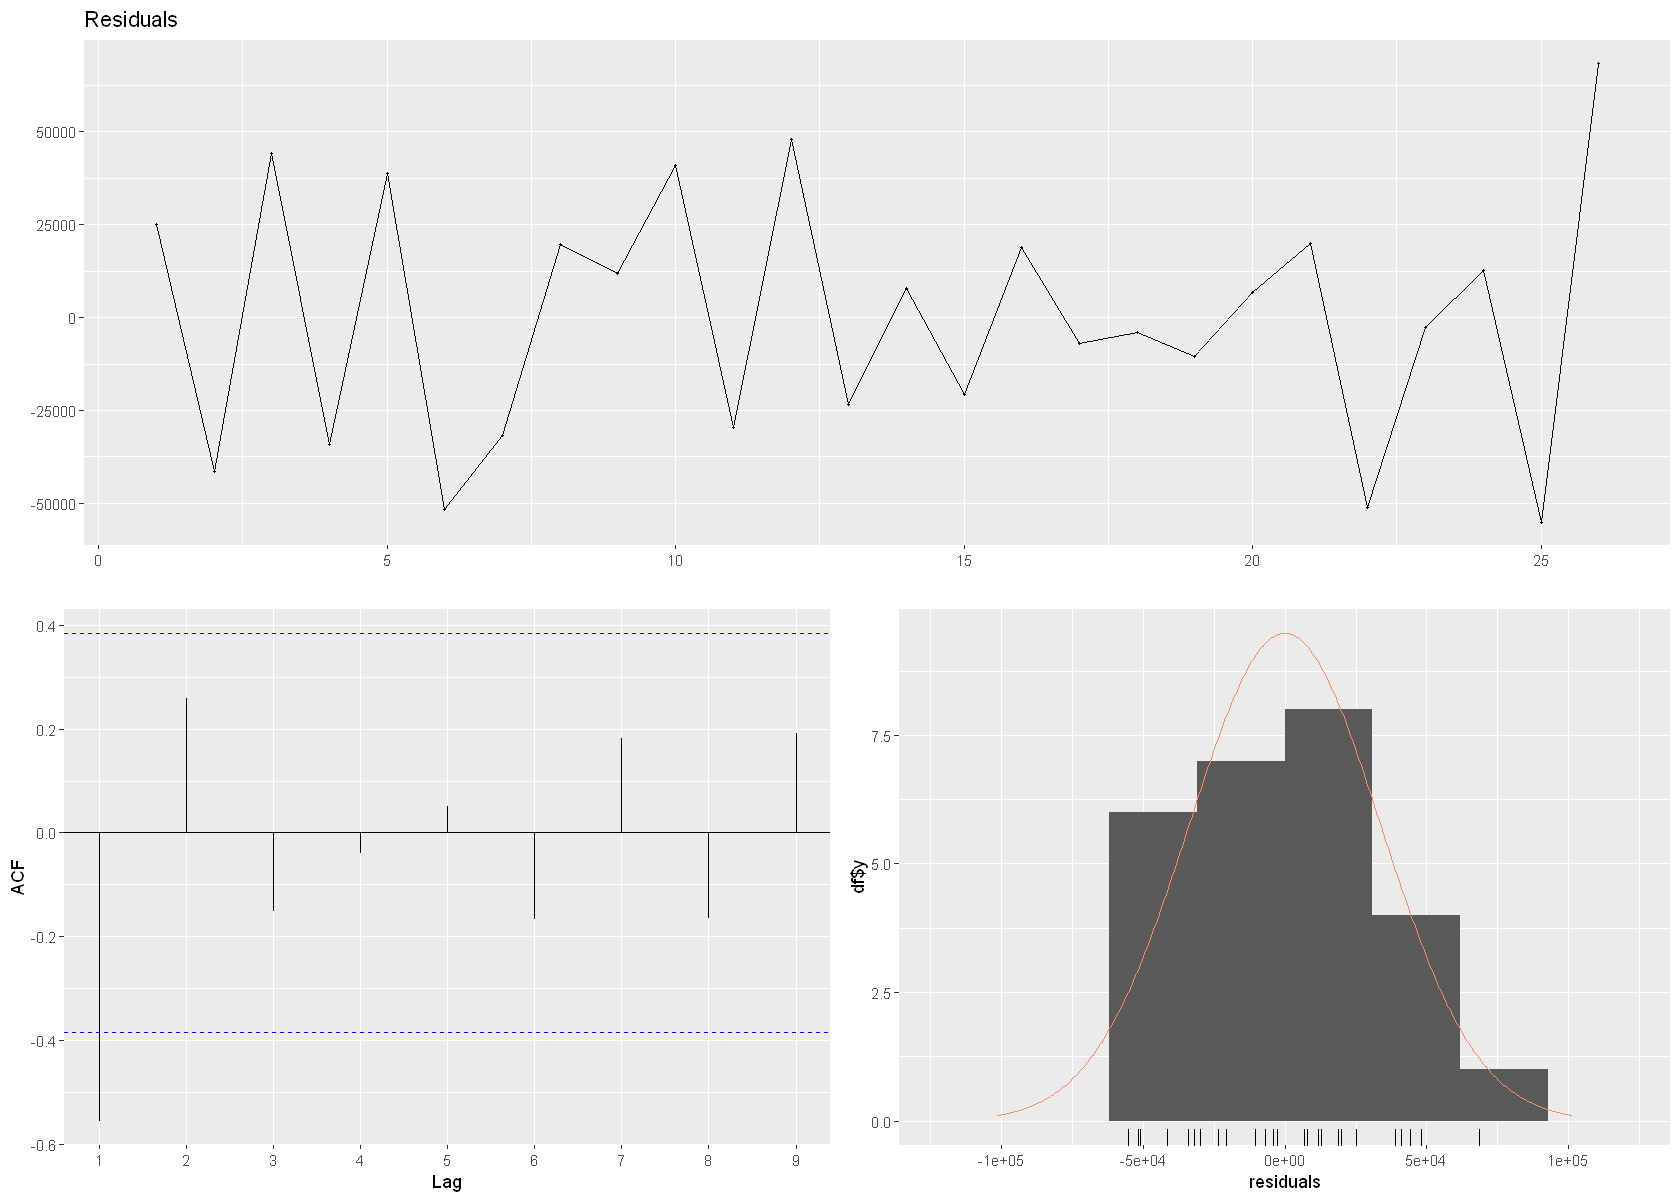

In [22]:
final_model<-model4
summary(final_model)
checkresiduals(final_model)

## 6-) Comparison of Predicted and Actual Values

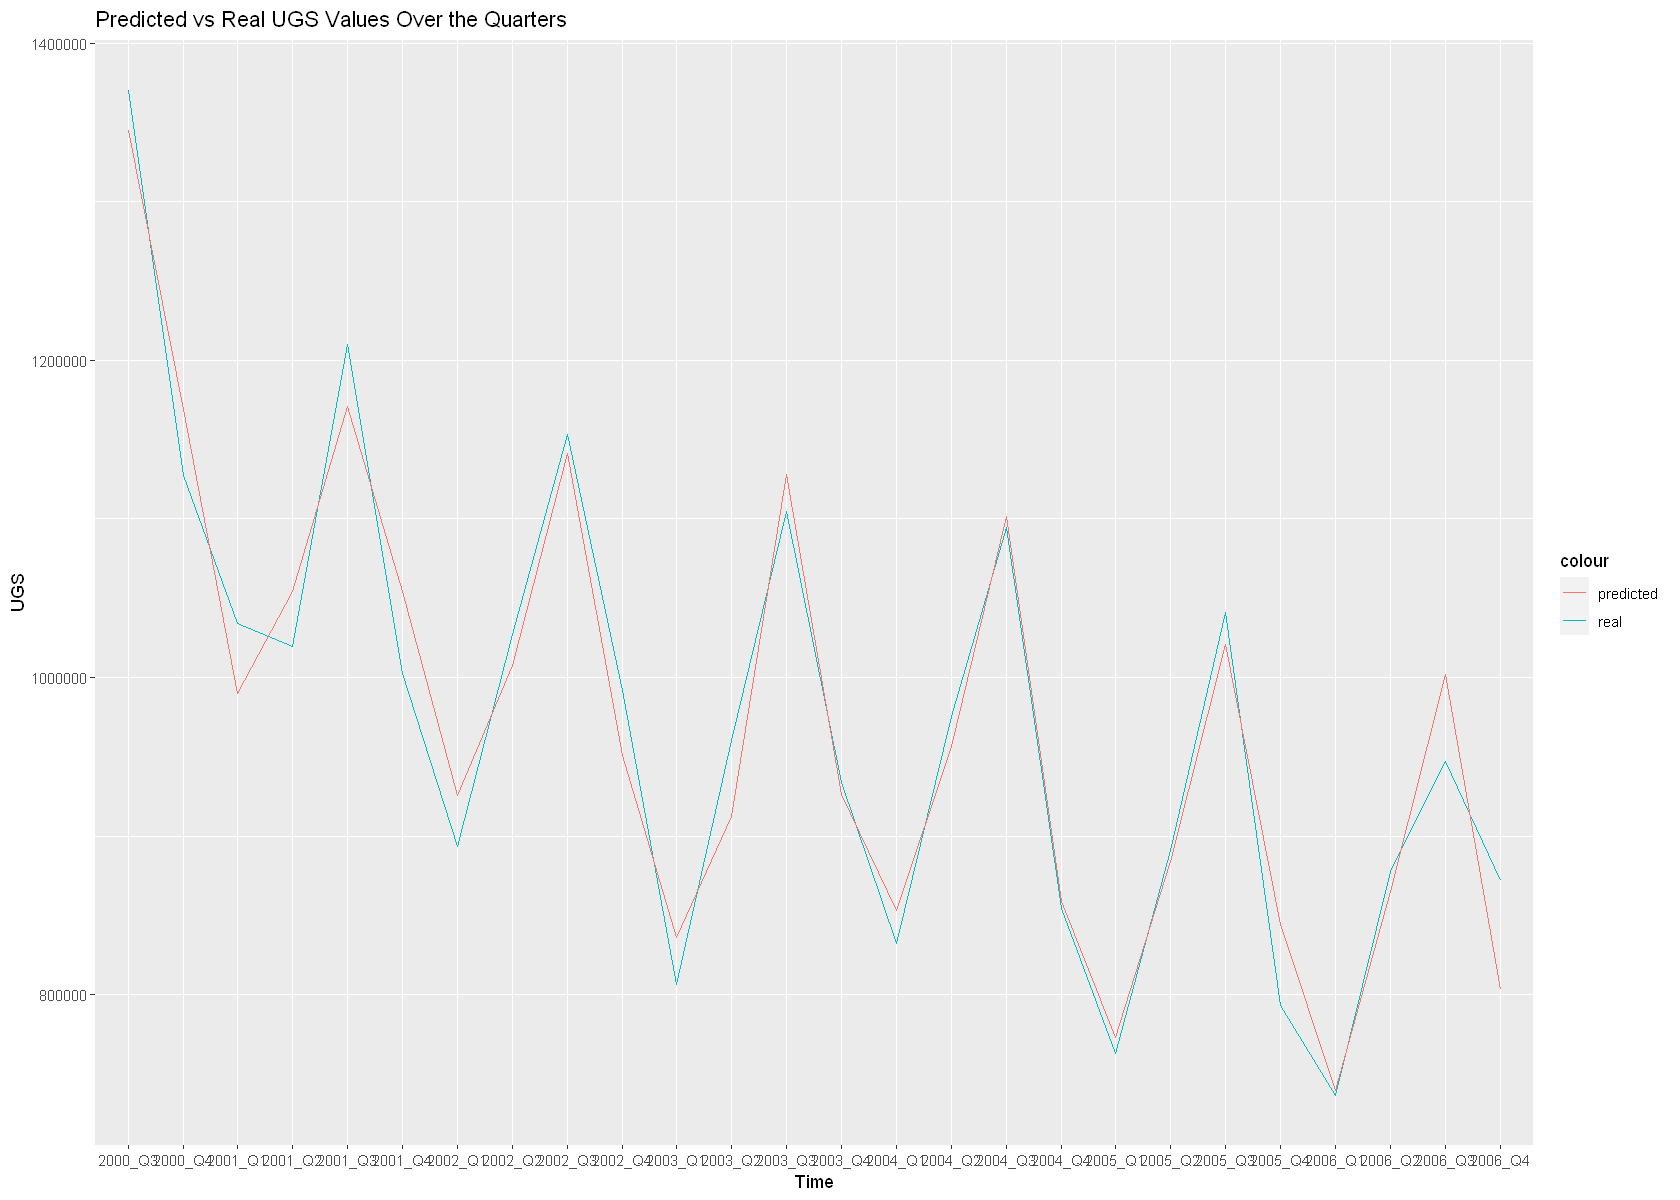

In [23]:
tmp=copy(hw_data[3:28])
tmp$predicted=predict(final_model,tmp)
ggplot(tmp ,aes(x=Time))+
  geom_line(aes(y=UGS,color='real',group=1)) + 
  geom_line(aes(y=predicted,color='predicted',group=1))+
  ggtitle("Predicted vs Real UGS Values Over the Quarters")

## 7-) Forecasting year of 2007

In [24]:
for(i in c(29:30)){
x<-predict(final_model,hw_data[i,])
hw_data[i,"UGS"]<-x
hw_data[i+2,"lagged"]<-x
}
for(i in c(31:32)){
hw_data[i,"UGS"]<-predict(final_model,hw_data[i,])
}
tail(hw_data,4)

year,quarter,UGS,RNUV,NLPG,PU,PG,NUGV,NDGV,GNPA,GNPC,GNP,Time,trend,lagged
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>
2007,1,741520.6,0.0074,1715000,565.19,449.19,5869018,342.1729,1132973,4857305,24413807,2007_Q1,29,946783.0
2007,2,775584.7,0.0106,1725300,565.19,449.19,5931348,346.9407,1570703,5852404,27597857,2007_Q2,30,872000.0
2007,3,959760.9,0.0101,1751050,565.19,449.19,5991280,351.4449,7140722,7480414,36741745,2007_Q3,31,741520.6
2007,4,815327.3,0.0124,1797400,565.19,449.19,6065597,357.2902,2418541,6397745,31361112,2007_Q4,32,775584.7
